In [1]:
import tensorflow as tf
from tensorflow.keras.metrics import BinaryAccuracy, Accuracy, Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

2023-11-28 18:59:22.432592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:59:22.486717: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 18:59:22.486747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 18:59:22.486774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 18:59:22.495246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:59:22.496354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
data = tf.keras.utils.image_dataset_from_directory("data")
data = data.map(lambda x,y: (x/255, y))
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
val_size = int(len(data) * 0.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 3591 files belonging to 2 classes.


In [2]:
model = load_model('models/imageclassifier.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

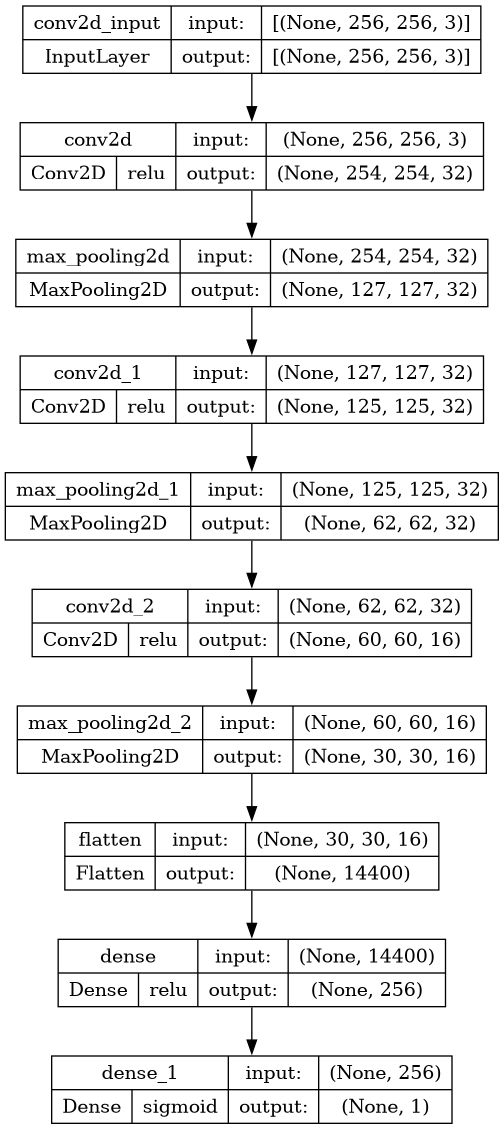

In [8]:
plot_model(model=model, to_file="plots/v1.png", show_shapes=True, show_layer_names=True, rankdir="TB", show_layer_activations=True )

In [4]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=[BinaryAccuracy(), Accuracy(), Precision(), Recall()])

In [6]:
test_hist = model.evaluate(test)

2023-11-26 18:10:43.702135: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35793000 exceeds 10% of free system memory.
2023-11-26 18:11:08.239618: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2023-11-26 18:11:09.364745: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2023-11-26 18:11:09.416109: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64000000 exceeds 10% of free system memory.


 1/22 [>.............................] - ETA: 16:25 - loss: 23.5331 - binary_accuracy: 0.7500 - accuracy: 0.5938 - precision: 0.7037 - recall: 1.0000

2023-11-26 18:11:09.904590: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


22/22 [==============================] - 56s 420ms/step - loss: 12.5642 - binary_accuracy: 0.8153 - accuracy: 0.5426 - precision: 0.7548 - recall: 0.9949


In [2]:
tf.__version__

'2.14.0'

In [3]:
model = load_model('models/vitiligoDetector.keras')
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=[BinaryAccuracy(), Accuracy(), Precision(), Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9

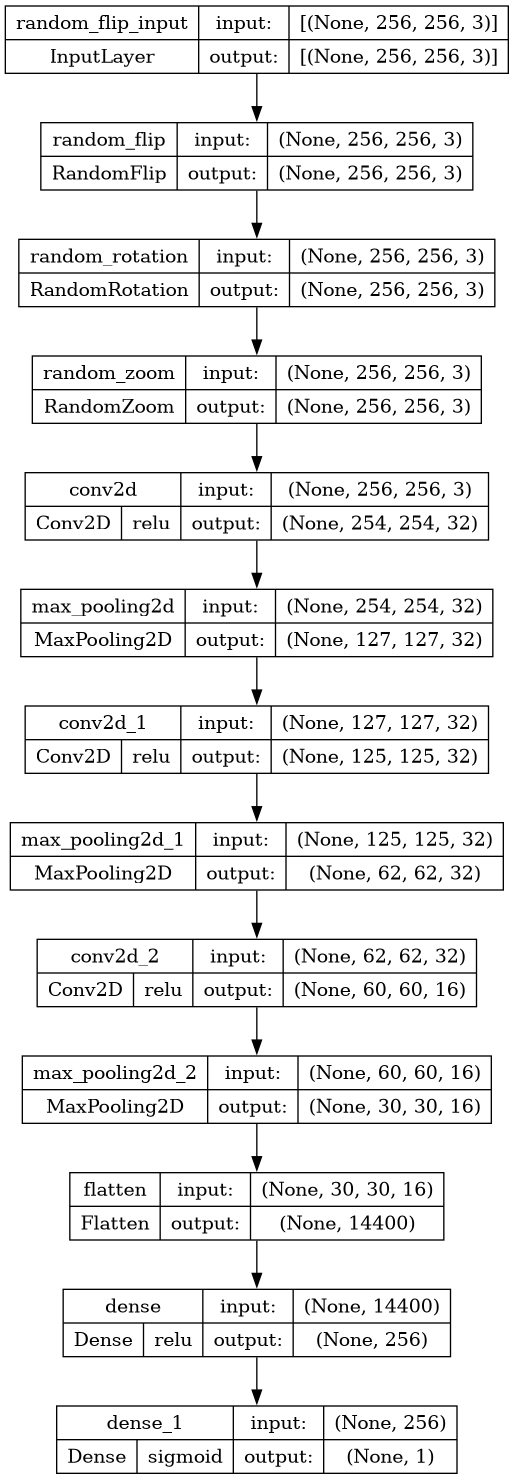

In [4]:
plot_model(model=model, to_file="plots/v2.png", show_shapes=True, show_layer_names=True, rankdir="TB", show_layer_activations=True )

In [11]:
test_hist = model.evaluate(test)

22/22 [==============================] - 48s 355ms/step - loss: 0.2911 - binary_accuracy: 0.8707 - accuracy: 0.0000e+00 - precision_1: 0.8595 - recall_1: 0.9221


In [5]:
model = load_model('models/resnet.keras')
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=[BinaryAccuracy(), Accuracy(), Precision(), Recall()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          589856    
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               295168    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24472993 (93.36 MB)
Trainable params: 885281 (3.38 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


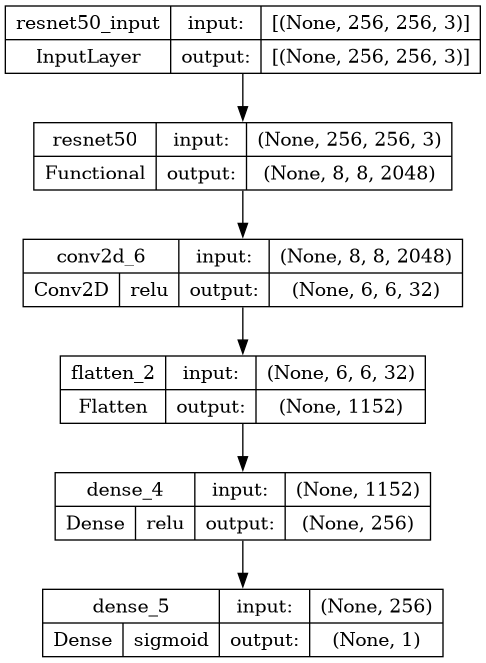

In [6]:
plot_model(model=model, to_file="plots/v3.png", show_shapes=True, show_layer_names=True, rankdir="TB", show_layer_activations=True )

In [13]:
test_hist = model.evaluate(test)

22/22 [==============================] - 116s 5s/step - loss: 0.2341 - binary_accuracy: 0.9091 - accuracy: 0.0000e+00 - precision_2: 0.9262 - recall_2: 0.9123


In [12]:
mdl = load_model('models/final.keras')
# mdl.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=[BinaryAccuracy(), Accuracy(), Precision(), Recall()])
# mdl.summary()

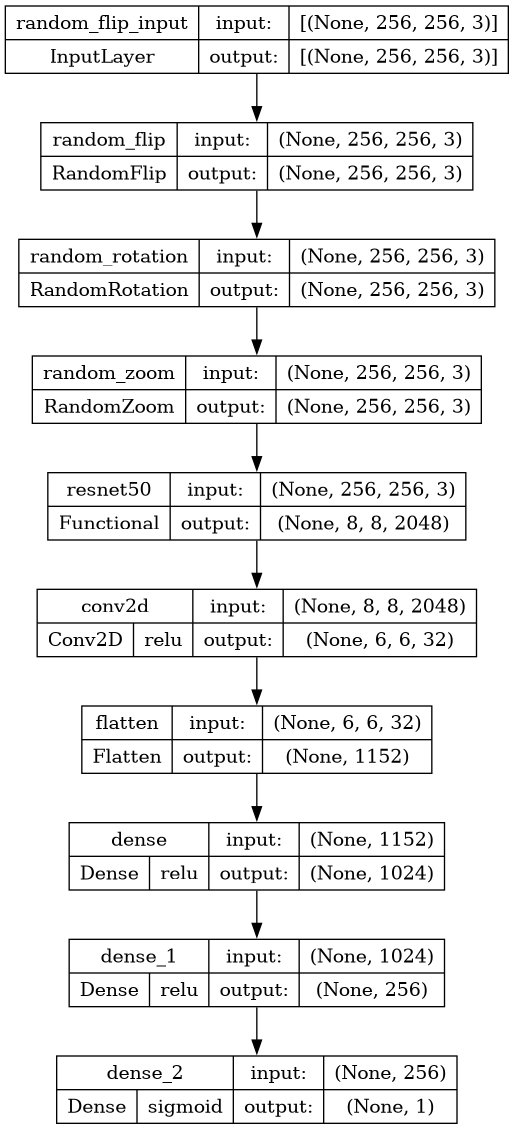

In [13]:
plot_model(model=mdl, to_file="plots/v4.png", show_shapes=True, show_layer_names=True, rankdir="TB", show_layer_activations=True )

In [6]:
mdl.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=[BinaryAccuracy(), Precision(), Recall()])
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          589856    
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                        

In [7]:
test_hist = mdl.evaluate(test)

22/22 [==============================] - 146s 5s/step - loss: 0.0915 - binary_accuracy: 0.9659 - accuracy: 0.3267 - precision_1: 0.9756 - recall_1: 0.9661
